# A walk through my process of building a machine learning system capable of predicting house prices

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Setup

In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Data loading

In [2]:
data_raw=pd.read_csv('train.csv')
data_val_raw=pd.read_csv('test.csv')

In [3]:
data=data_raw.copy()
data_val=data_val_raw.copy()

# Data Wrangling

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.shape

(1460, 81)

In [6]:
data_val.shape

(1459, 80)

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data_val.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
nans=data.isna().sum()

In [10]:
nans[nans>=1]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
nans_val=data_val.isna().sum()

In [12]:
nans_val[nans_val>=1]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## Handling missing and duplicated values

In [13]:
def drop_columns(df):
    return df.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])

In [14]:
data=drop_columns(data)

Perhaps I might consider removing the "FireplaceQu" variable, which denotes the quality of the fireplace, at a later stage. However, it is possible that this variable may have some correlation with the house price or other features. Therefore, I will keep it for the time being until I conduct further investigation. As for the other features, I have dropped them since they had over 1000 missing values, which is nearly as large as the entire dataset. Also, I have dropped 'Id' since it doesn't provide any information.

In [15]:
data.groupby('FireplaceQu')['SalePrice'].median().sort_values()

FireplaceQu
Po    131500.0
Fa    158000.0
TA    187500.0
Gd    206950.0
Ex    314250.0
Name: SalePrice, dtype: float64

In [16]:
data.groupby('OverallQual')['SalePrice'].median().sort_values()

OverallQual
1      50150.0
2      60000.0
3      86250.0
4     108000.0
5     133000.0
6     160000.0
7     200141.0
8     269750.0
9     345000.0
10    432390.0
Name: SalePrice, dtype: float64

In [17]:
# fills the missing values in the "FireplaceQu" column based on "OveralQual" category

def fill_fireplace(df):
    df['FireplaceQu']=np.select([(df.OverallQual.isin([1,2]))&(df['FireplaceQu']==np.nan),
                                 (df.OverallQual.isin([3,4]))&(df['FireplaceQu']==np.nan),
                                 (df.OverallQual.isin([5,6]))&(df['FireplaceQu']==np.nan),
                                 (df.OverallQual.isin([7,8]))&(df['FireplaceQu']==np.nan),
                                 (df.OverallQual.isin([9,10]))&(df['FireplaceQu']==np.nan)],
                                ['Po','Fa','TA','Gd','Ex'])
    return df

In [18]:
data=fill_fireplace(data)

In [19]:
data['FireplaceQu'].isna().sum()

0

In [20]:
data.duplicated().sum()

0

In [21]:
data_val.duplicated().sum()


0

In [22]:
#splits a dataset in two: categorical and numerical

def split_num_cat(df):
    dtypes=df.dtypes
    df_num=df.loc[:,[col for col in list(dtypes.index) if dtypes[col]!='object']]
    df_cat=df.loc[:,[col for col in list(dtypes.index) if dtypes[col]=='object']]
    return df_num, df_cat

In [23]:
data_num, data_cat=split_num_cat(data)

In [24]:
num_columns=data_num.columns.to_list()
cat_columns=data_cat.columns.to_list()

In [25]:
# fill NaN with median (numerical attributes)

num_imputer = SimpleImputer(strategy="median")
data_num = num_imputer.fit_transform(data_num) # an array is returned
data_num = pd.DataFrame(data_num, columns=num_columns)

In [26]:
data_num.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [27]:
# fill NaN with most frequent value (categorical attributes)

cat_imputer = SimpleImputer(strategy="most_frequent")
data_cat = cat_imputer.fit_transform(data_cat) # an array is returned
data_cat = pd.DataFrame(data_cat, columns=cat_columns)

In [28]:
data_cat.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [29]:
data_cat.shape

(1460, 39)

In [30]:
data_num.shape

(1460, 37)

## Pre-selection of numerical features

<AxesSubplot:>

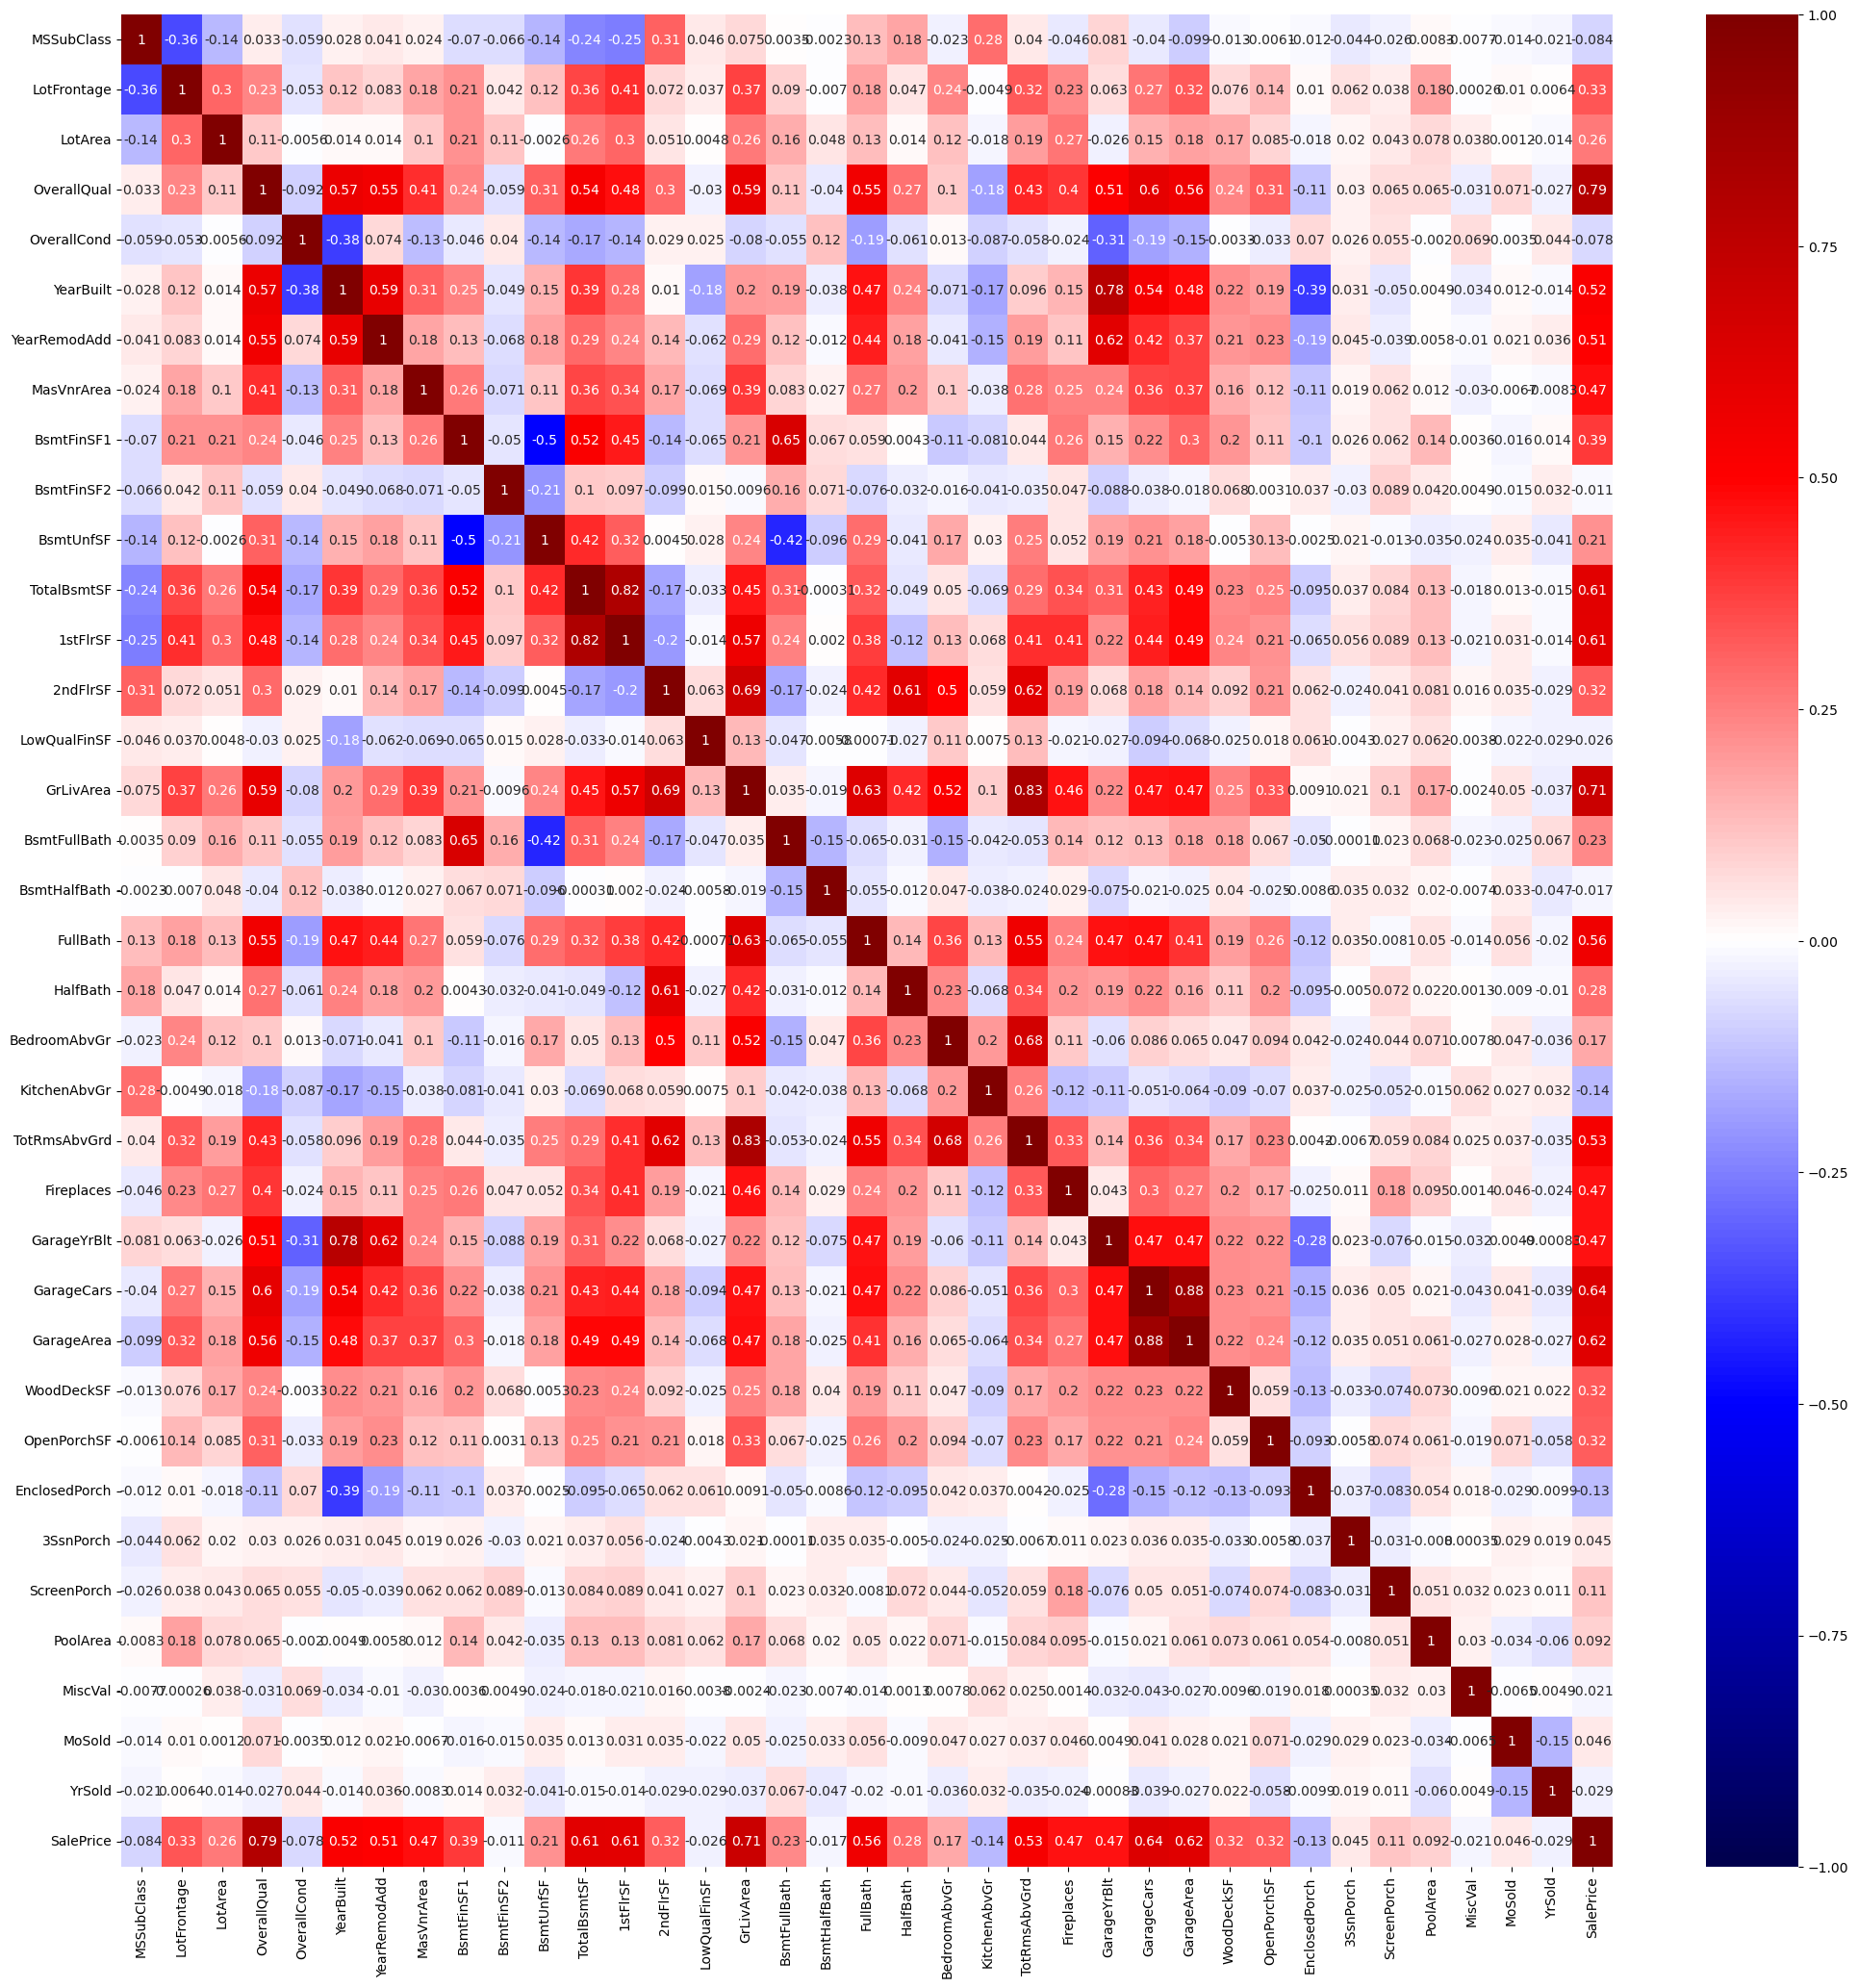

In [31]:
plt.subplots(figsize=(25,25))
sns.heatmap(data_num.corr(), annot=True, vmin=-1, vmax=1,cmap='seismic')

In [32]:
# Retains characteristics that exhibit a Pearson correlation value of over 0.4 with the SalePrice.

data_corr=data_num.corr()
num_features_to_keep=data_corr[(data_corr['SalePrice']>=0.4)].index.to_list()

In [33]:
num_features_to_keep

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [34]:
data_num=data_num[num_features_to_keep]

In [35]:
data_num.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7.0,2003.0,2003.0,196.0,856.0,856.0,1710.0,2.0,8.0,0.0,2003.0,2.0,548.0,208500.0
1,6.0,1976.0,1976.0,0.0,1262.0,1262.0,1262.0,2.0,6.0,1.0,1976.0,2.0,460.0,181500.0
2,7.0,2001.0,2002.0,162.0,920.0,920.0,1786.0,2.0,6.0,1.0,2001.0,2.0,608.0,223500.0
3,7.0,1915.0,1970.0,0.0,756.0,961.0,1717.0,1.0,7.0,1.0,1998.0,3.0,642.0,140000.0
4,8.0,2000.0,2000.0,350.0,1145.0,1145.0,2198.0,2.0,9.0,1.0,2000.0,3.0,836.0,250000.0


## Pre-selection of categorical features

In [36]:
data_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,0,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,0,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,0,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,0,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,0,Attchd,RFn,TA,TA,Y,WD,Normal


In [37]:
encoder=OrdinalEncoder()
data_cat_encoded=encoder.fit_transform(data_cat)
data_cat_encoded=pd.DataFrame(data_cat_encoded,columns=cat_columns)

In [38]:
data_cat_encoded.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,6.0,0.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,3.0,6.0,0.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,6.0,0.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,2.0,6.0,0.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,2.0,6.0,0.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


In [39]:
model = RandomForestRegressor(random_state=42)
model.fit(data_cat_encoded, data_num['SalePrice'])
importances = model.feature_importances_
importances = pd.DataFrame({'importance':importances,'feature':cat_columns}).sort_values(by='importance',
                                                                                         ascending=False).reset_index(drop=True)

In [40]:
cat_features_to_keep=importances.iloc[:10,:]['feature'].to_list()

In [41]:
cat_features_to_keep

['ExterQual',
 'BsmtQual',
 'Neighborhood',
 'KitchenQual',
 'GarageFinish',
 'BsmtExposure',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'SaleCondition']

In [42]:
data_cat=data_cat[cat_features_to_keep].copy()

In [43]:
data_cat.head()

,ExterQual,BsmtQual,Neighborhood,KitchenQual,GarageFinish,BsmtExposure,HouseStyle,Exterior1st,Exterior2nd,SaleCondition
0,Gd,Gd,CollgCr,Gd,RFn,No,2Story,VinylSd,VinylSd,Normal
1,TA,Gd,Veenker,TA,RFn,Gd,1Story,MetalSd,MetalSd,Normal
2,Gd,Gd,CollgCr,Gd,RFn,Mn,2Story,VinylSd,VinylSd,Normal
3,TA,TA,Crawfor,Gd,Unf,No,2Story,Wd Sdng,Wd Shng,Abnorml
4,Gd,Gd,NoRidge,Gd,RFn,Av,2Story,VinylSd,VinylSd,Normal


In [44]:
# This list of features to keep we'll me used later in the overall pipeline
columns_to_keep=data_num.columns.to_list()+data_cat.columns.to_list()

In [45]:
columns_to_keep.remove('SalePrice')

In [46]:
columns_to_keep

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'ExterQual',
 'BsmtQual',
 'Neighborhood',
 'KitchenQual',
 'GarageFinish',
 'BsmtExposure',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'SaleCondition']

# Exploratory Data Analysis

It's convient now to list the meaning of each selected feature.
- (0) OverallQual: Overall material and finish quality
- (1) YearBuilt: Original construction date
- (2) YearRemodAdd: Remodel date
- (3) MasVnrArea: Masonry veneer area in square feet
- (4) TotalBsmtSF: Total square feet of basement area
- (5) 1stFlrSF: First Floor square feet
- (6) GrLivArea: Above grade (ground) living area square feet
- (7) FullBath: Full bathrooms above grade
- (8) TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- (9) Fireplaces: Number of fireplaces
- (10) GarageYrBlt: Year garage was built
- (11) GarageCars: Size of garage in car capacity
- (12) GarageArea: Size of garage in square feet
>
- (13) ExterQual: Evaluates the quality of the material on the exterior
- (14) BsmtQual: Evaluates the height of the basement
- (15) KitchenQual: kitchen quality
- (16) Neighborhood: Physical locations within Ames city limits
- (17) GarageFinish: Interior finish of the garage
- (18) BsmtExposure: Refers to walkout or garden level walls
- (19) HouseStyle: Style of dwelling
- (20) SaleCondition: Condition of sale
- (21) Exterior2nd: Exterior covering on house (if more than one material)
- (22) GarageType: garage location

In [47]:
df=data[columns_to_keep+['SalePrice']].copy()

In [48]:
df.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,BsmtQual,Neighborhood,KitchenQual,GarageFinish,BsmtExposure,HouseStyle,Exterior1st,Exterior2nd,SaleCondition,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,Gd,CollgCr,Gd,RFn,No,2Story,VinylSd,VinylSd,Normal,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,Gd,Veenker,TA,RFn,Gd,1Story,MetalSd,MetalSd,Normal,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,Gd,CollgCr,Gd,RFn,Mn,2Story,VinylSd,VinylSd,Normal,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,TA,Crawfor,Gd,Unf,No,2Story,Wd Sdng,Wd Shng,Abnorml,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,Gd,NoRidge,Gd,RFn,Av,2Story,VinylSd,VinylSd,Normal,250000


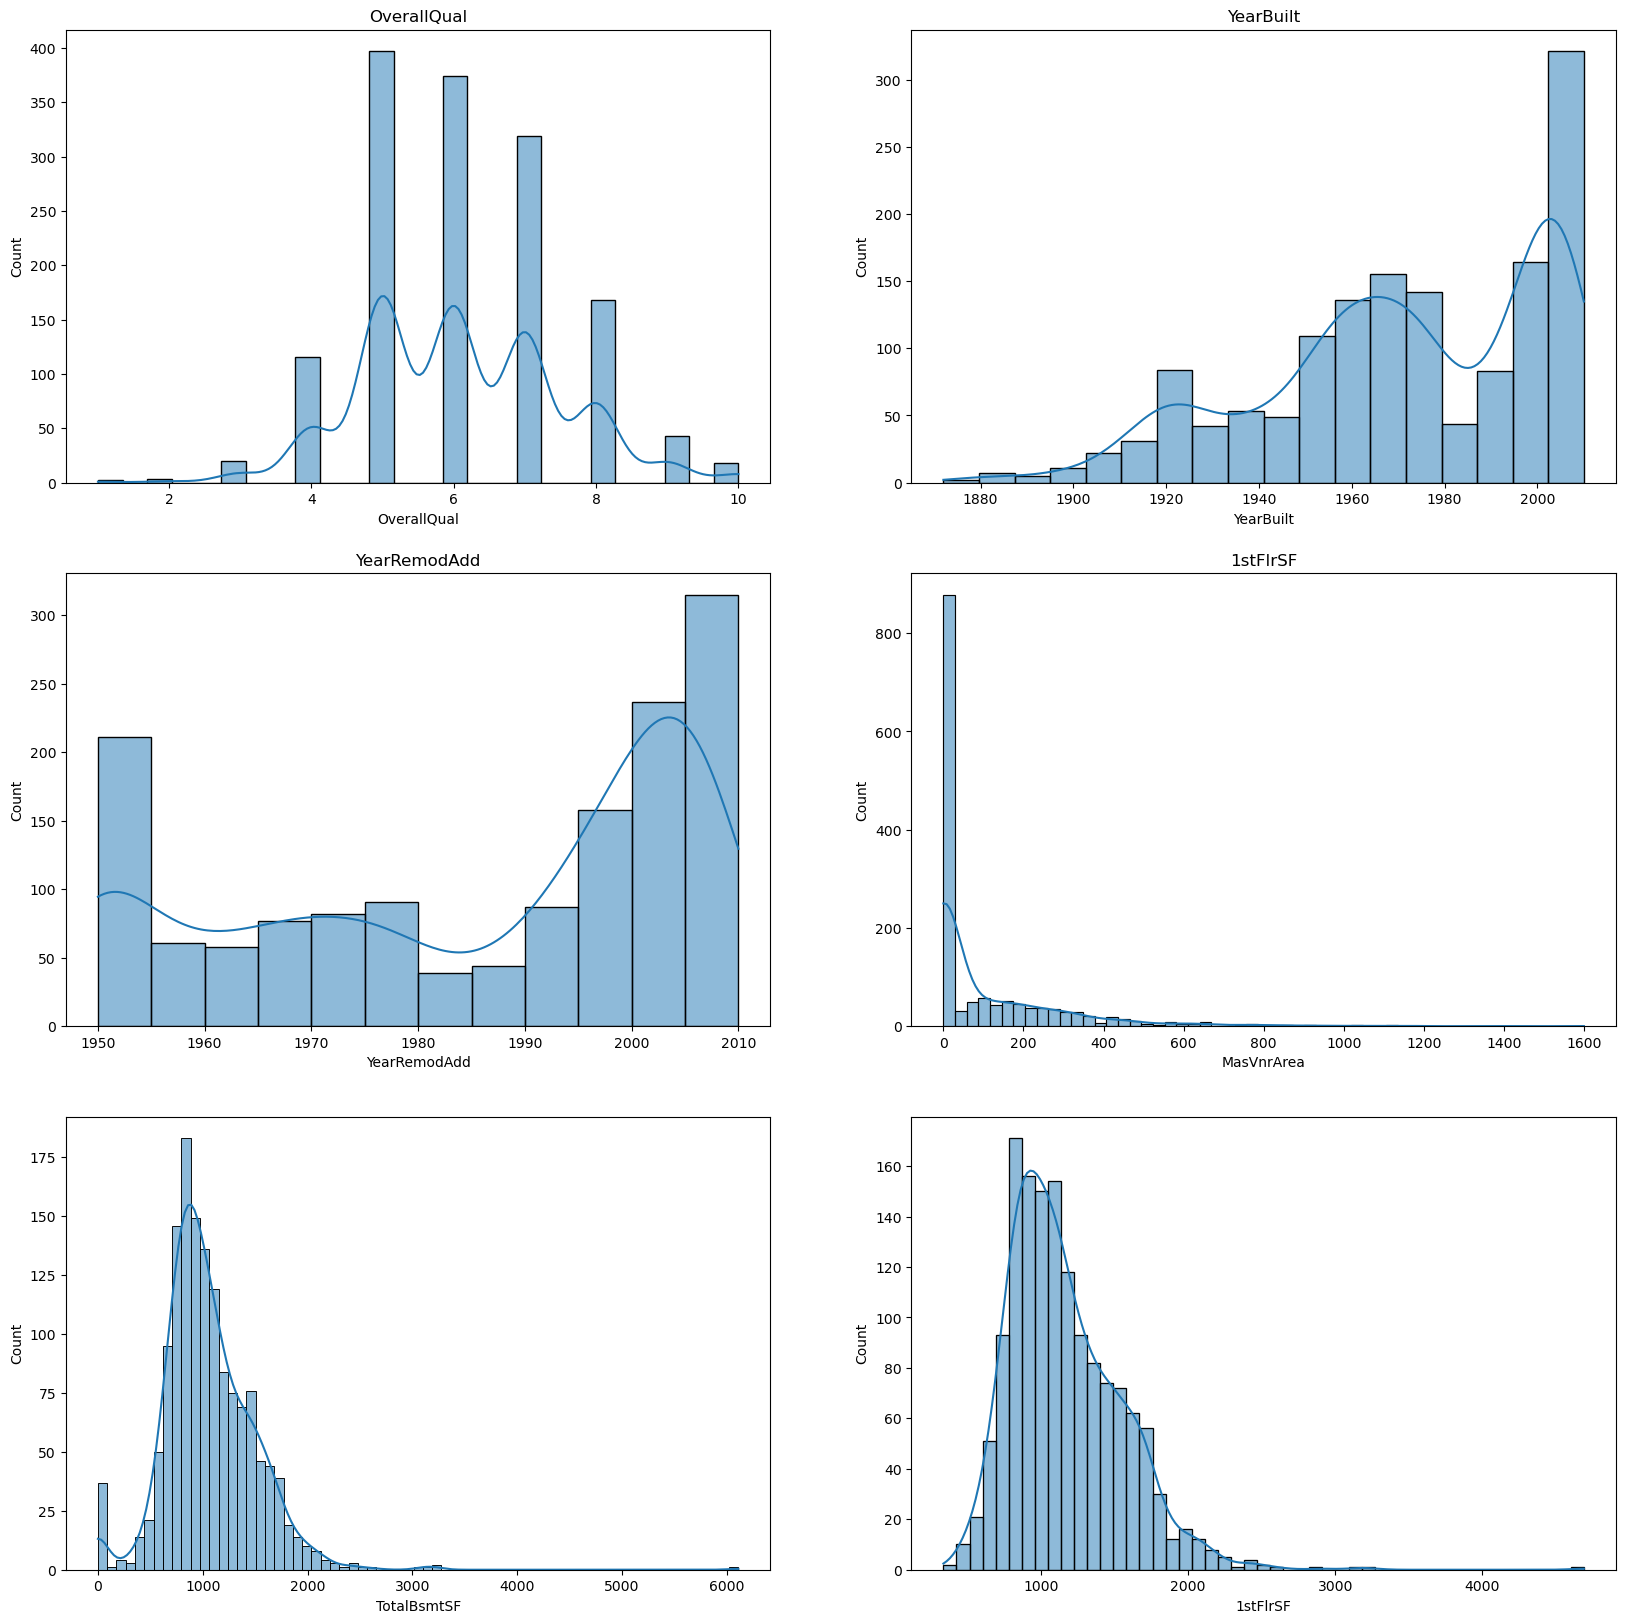

In [49]:
fig, ax = plt.subplots(3,2,figsize=(20,20))

sns.histplot(data=df,x=df[df.columns[0]],ax=ax[0,0],kde=True)
ax[0,0].set_title('OverallQual')

sns.histplot(data=df,x=df[df.columns[1]],ax=ax[0,1],kde=True)
ax[0,1].set_title('{}'.format(df.columns[1]))

sns.histplot(data=df,x=df[df.columns[2]],ax=ax[1,0],kde=True)
ax[1,0].set_title('{}'.format(df.columns[2]))

sns.histplot(data=df,x=df[df.columns[3]],ax=ax[1,1],kde=True)
ax[1,1].set_title('{}'.format(df.columns[3]))

sns.histplot(data=df,x=df[df.columns[4]],ax=ax[2,0],kde=True)
ax[1,1].set_title('{}'.format(df.columns[4]))

sns.histplot(data=df,x=df[df.columns[5]],ax=ax[2,1],kde=True)
ax[1,1].set_title('{}'.format(df.columns[5]))

plt.show()


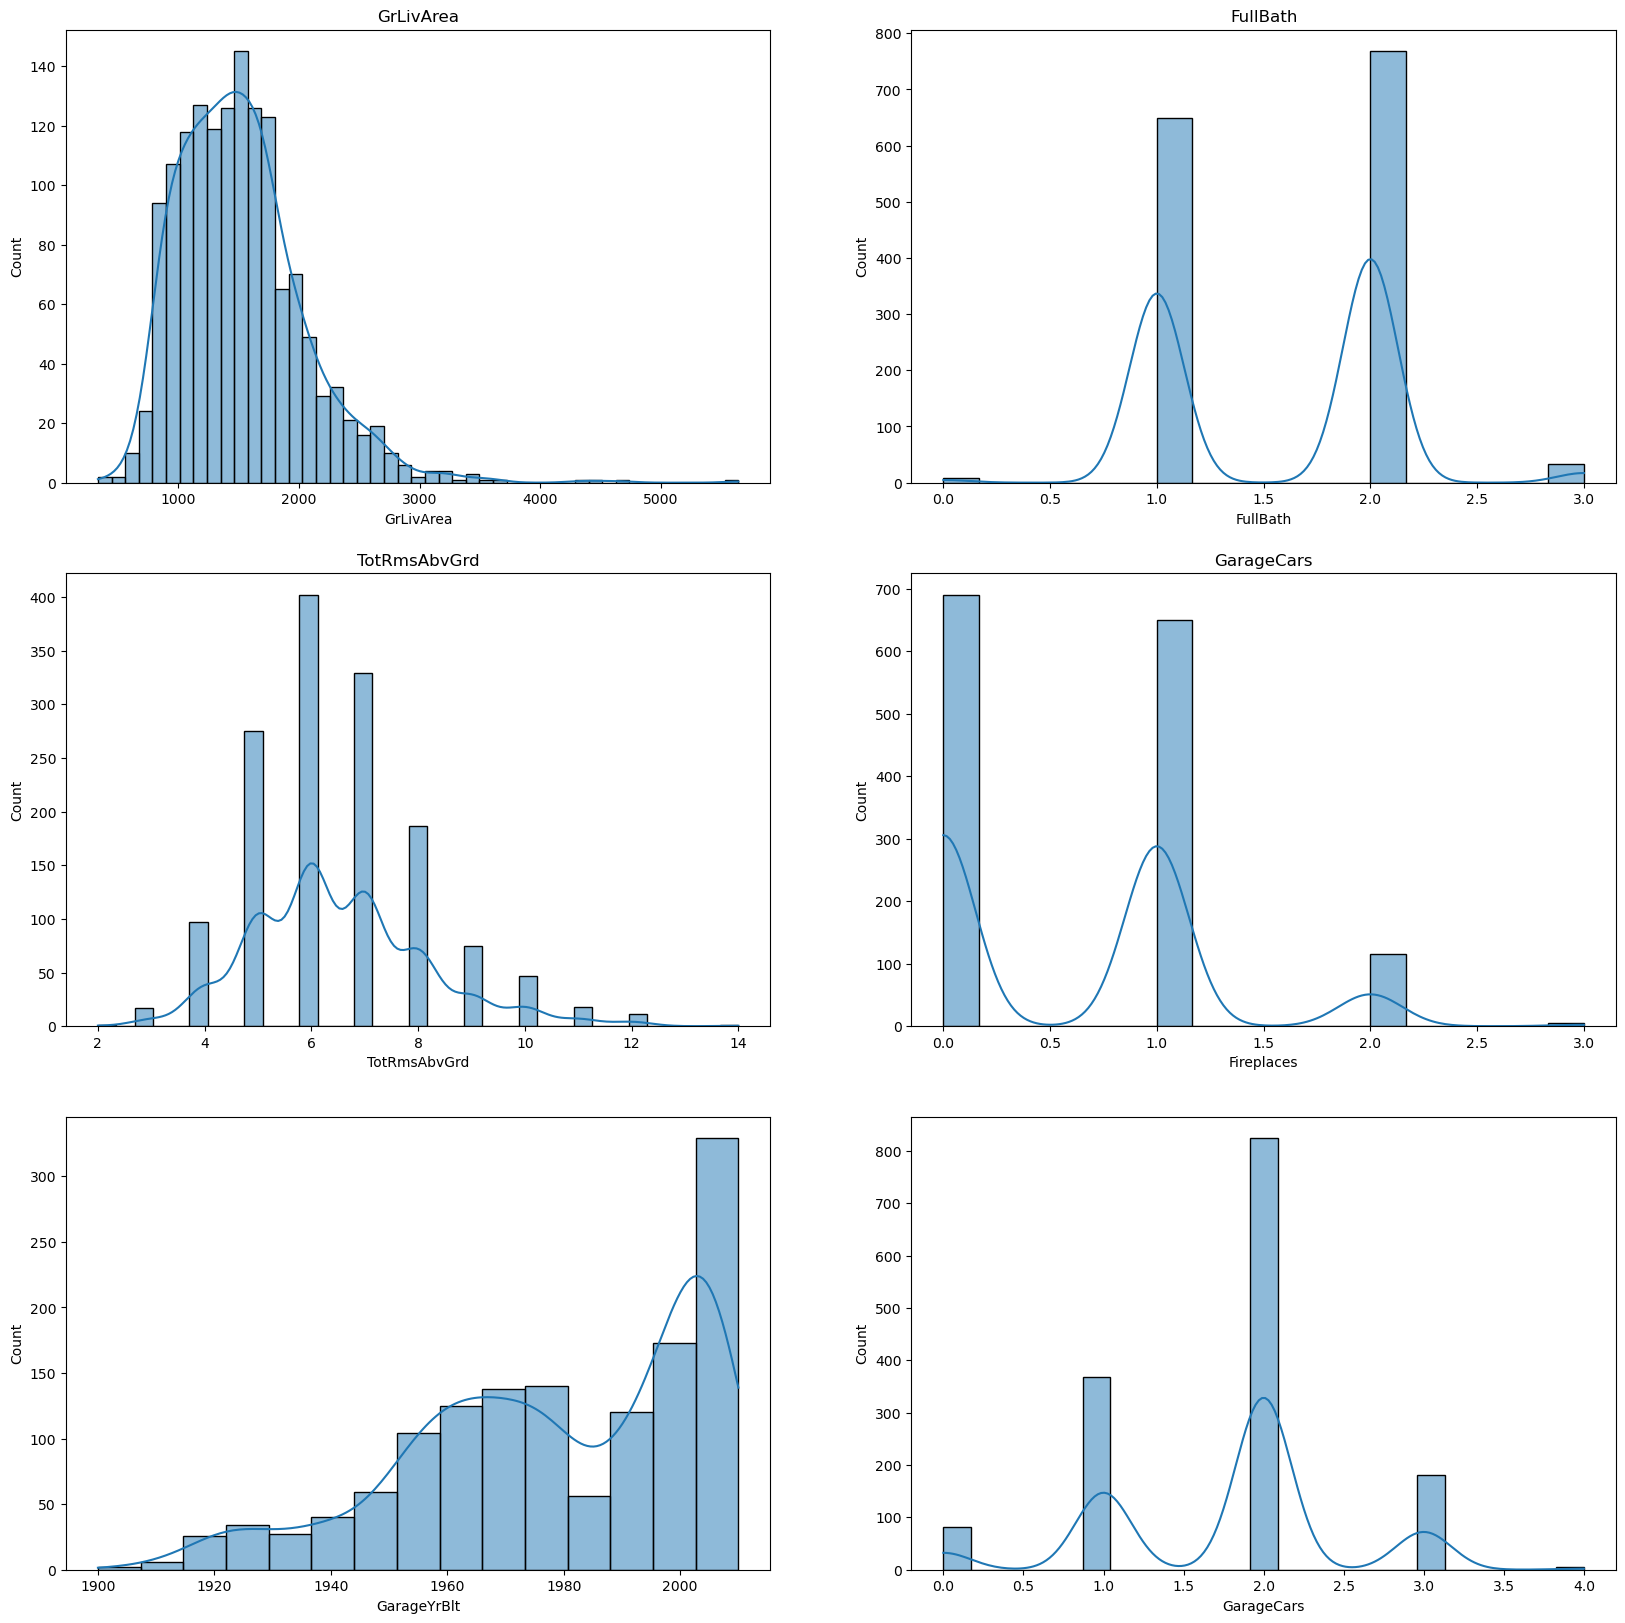

In [50]:
fig, ax = plt.subplots(3,2,figsize=(20,20))

sns.histplot(data=df,x=df[df.columns[6]],ax=ax[0,0],kde=True)
ax[0,0].set_title('{}'.format(df.columns[6]))

sns.histplot(data=df,x=df[df.columns[7]],ax=ax[0,1],kde=True)
ax[0,1].set_title('{}'.format(df.columns[7]))

sns.histplot(data=df,x=df[df.columns[8]],ax=ax[1,0],kde=True)
ax[1,0].set_title('{}'.format(df.columns[8]))

sns.histplot(data=df,x=df[df.columns[9]],ax=ax[1,1],kde=True)
ax[1,1].set_title('{}'.format(df.columns[9]))

sns.histplot(data=df,x=df[df.columns[10]],ax=ax[2,0],kde=True)
ax[1,1].set_title('{}'.format(df.columns[10]))

sns.histplot(data=df,x=df[df.columns[11]],ax=ax[2,1],kde=True)
ax[1,1].set_title('{}'.format(df.columns[11]))

plt.show()

Text(0.5, 1.0, 'OverallQual x SalePrice')

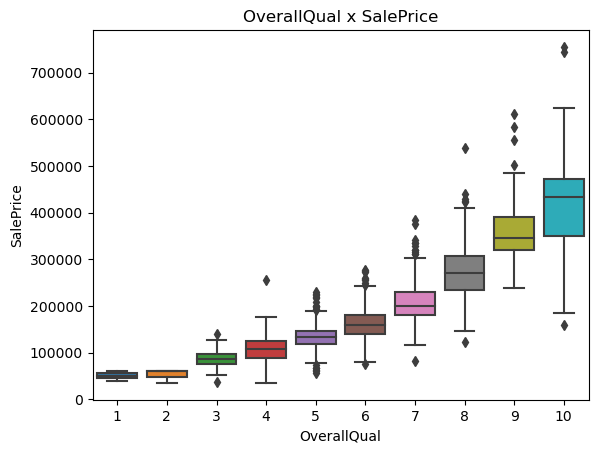

In [51]:
sns.boxplot(data=df,x=df.OverallQual,y=df.SalePrice)
plt.title('OverallQual x SalePrice')

In [52]:
df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

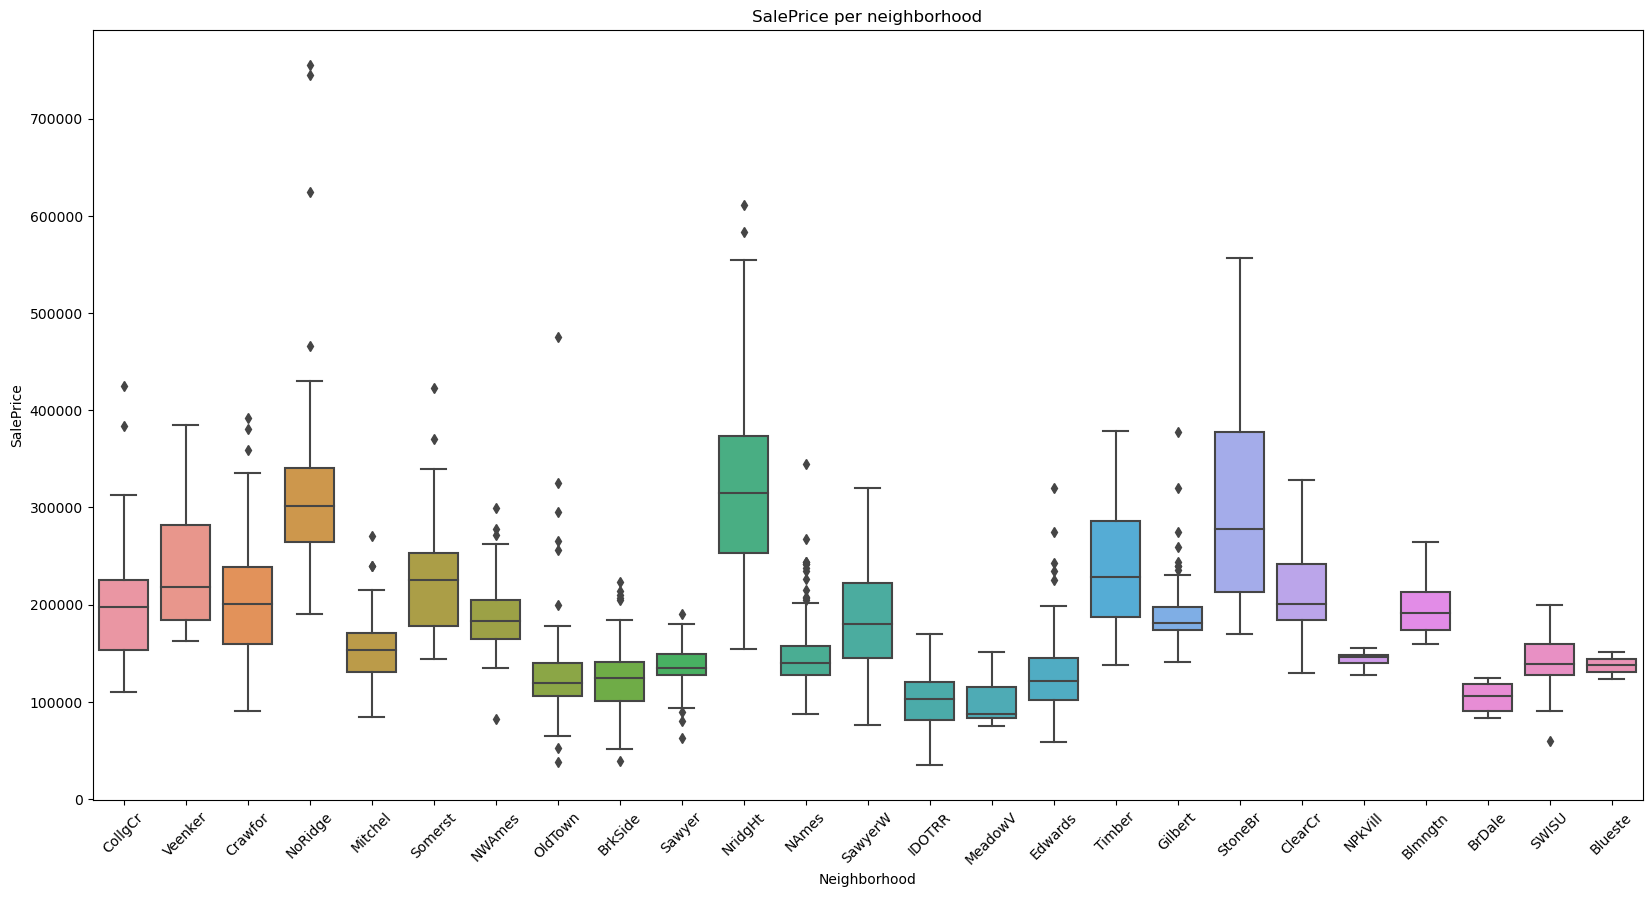

In [53]:
plt.subplots(figsize=(20,10))
sns.boxplot(data=df,x=df.Neighborhood,y=df.SalePrice)
plt.xticks(rotation=45)
plt.title('SalePrice per neighborhood')
plt.show()

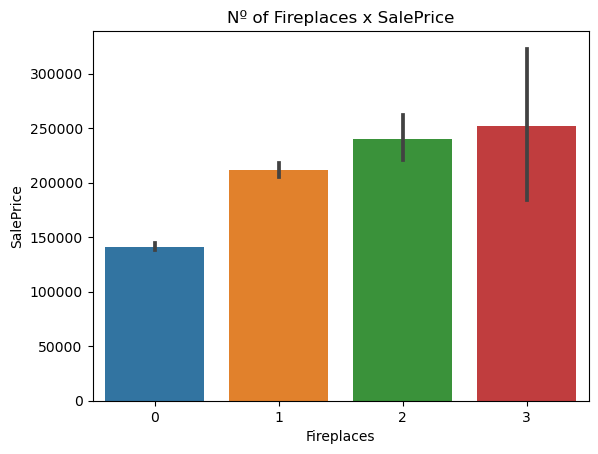

In [54]:
sns.barplot(data=df,x=df.Fireplaces,y=df.SalePrice)
plt.title('Nº of Fireplaces x SalePrice')
plt.show()

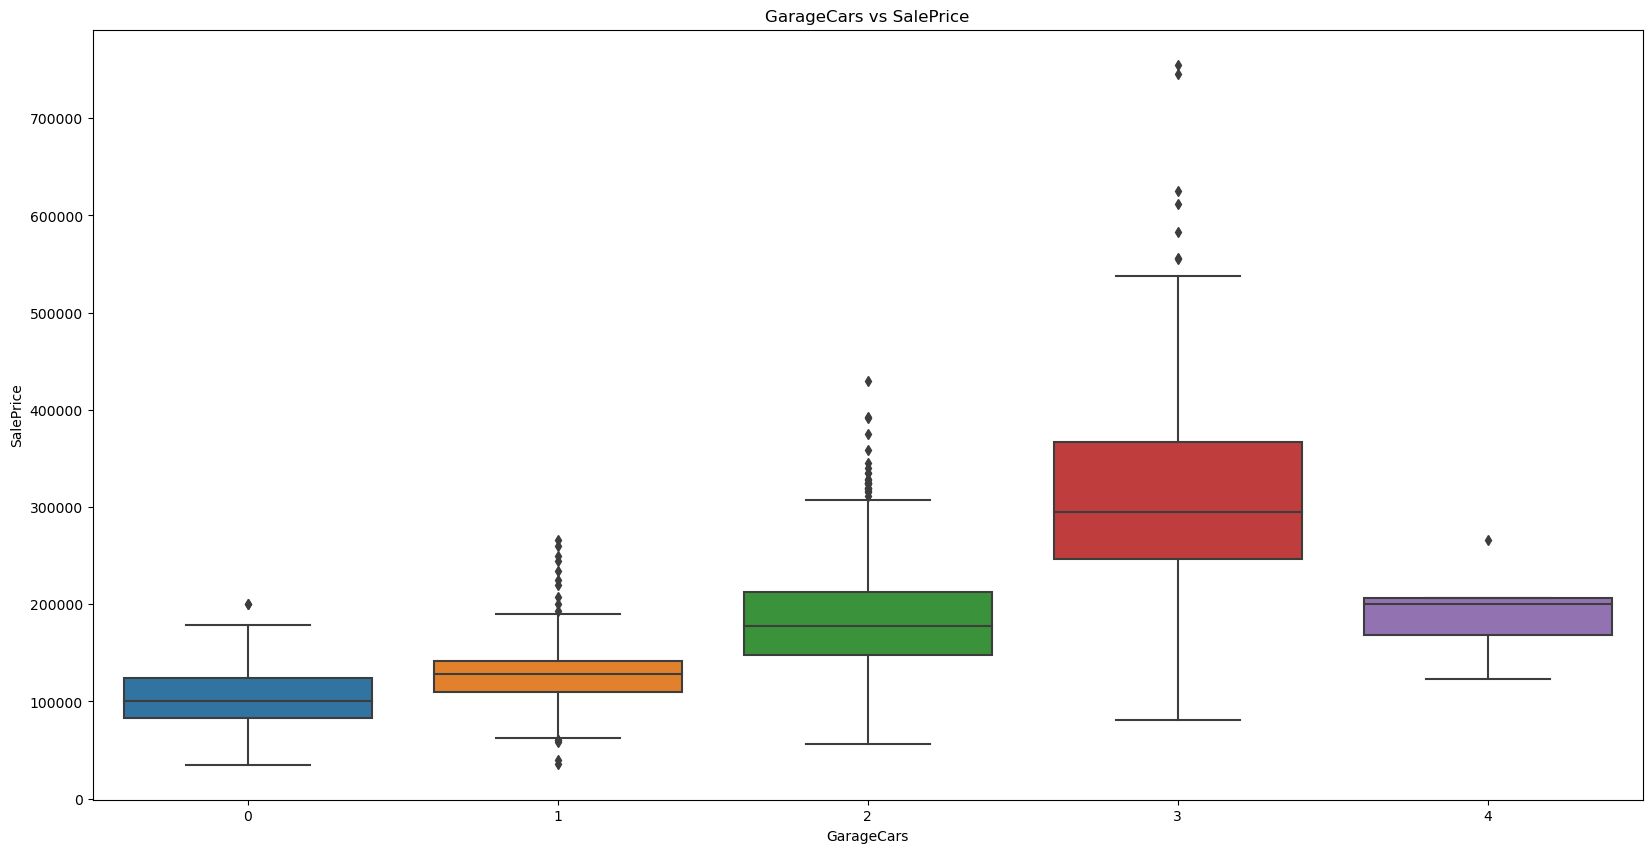

In [55]:
plt.subplots(figsize=(20,10))
sns.boxplot(data=df,x=df.GarageCars,y=df.SalePrice)
plt.title('GarageCars vs SalePrice')
plt.show()

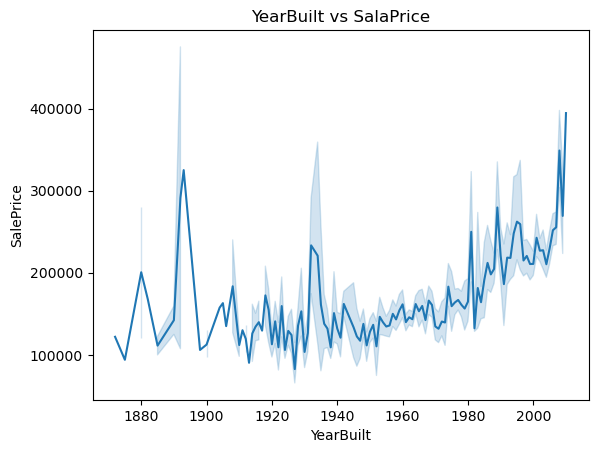

In [56]:
sns.lineplot(data=df,x='YearBuilt',y='SalePrice')
plt.title('YearBuilt vs SalaPrice')
plt.show()

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

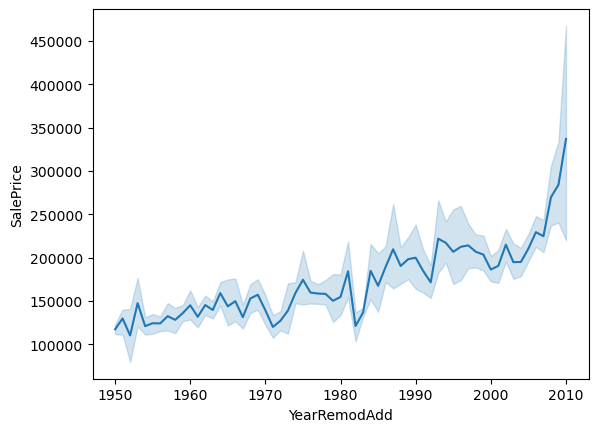

In [57]:
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=df)

# Handling outliers

In [58]:
def remove_outliers(df):
    
    for col in num_columns:
        
        lower = df[col].mean() - 2.5*df[col].std() # lower threshold
        upper = df[col].mean() + 2.5*df[col].std() # upper threshold
    
    mask = (df[col] < lower) | (df[col] > upper)
        
    return df[~mask]              

In [59]:
data_res=remove_outliers(data)

In [60]:
data_res.shape

(1420, 76)

In [61]:
data.shape

(1460, 76)

# Transformation Pipeline

In [70]:
num_features_to_keep.remove('SalePrice')

In [62]:
num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()),
                        ])

cat_pipeline=Pipeline([
                      ('imputer',SimpleImputer(strategy='most_frequent')),
                      ('onehot',OneHotEncoder())
                      ])

In [63]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice'].copy()

In [64]:
#feature selecting
x=x[columns_to_keep].copy()

In [65]:
x_num, x_cat = split_num_cat(x)

In [71]:
x_num=num_pipeline.fit_transform(x_num)
x_num=pd.DataFrame(x_num,columns=num_features_to_keep)

In [72]:
x_cat=cat_pipeline.fit_transform(x_cat)
x_cat=pd.DataFrame(x_cat.toarray())

In [73]:
x=pd.concat([x_num,x_cat],axis=1)

# Train and Test sets

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model pre-selection through cross-validation

In [93]:
x_train.columns=x_train.columns.astype('str')
x_test.columns=x_train.columns.astype('str')

In [76]:
forest=RandomForestRegressor()

tree=DecisionTreeRegressor()

gbr=GradientBoostingRegressor()

svr=SVR()

In [77]:
models=[['Random Forest',forest],['Decision Tree',tree],
        ['Gradient Boost',gbr],['SVR',svr]]

In [78]:
for model in models:
    
    scores = cross_val_score(model[1], x_train, y_train,
    scoring="neg_mean_squared_log_error", cv=10)
    scores = np.sqrt(-scores)

    print("{} Scores:".format(model[0]), scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print('----------------')

Random Forest Scores: [0.15934675 0.13210426 0.20384977 0.19705499 0.18277519 0.15888074
 0.1554604  0.13157661 0.14275637 0.11773065]
Mean: 0.15815357135085645
Standard deviation: 0.027336568402924897
----------------
Decision Tree Scores: [0.20246621 0.21277594 0.27770565 0.2092899  0.27122997 0.2428641
 0.22834869 0.19387574 0.2083489  0.17801494]
Mean: 0.22249200325929314
Standard deviation: 0.030887079282038783
----------------
Gradient Boost Scores: [0.15939958 0.11997515 0.18976952 0.16740823 0.15941571 0.15136576
 0.1398505  0.13908418 0.13945894 0.11726738]
Mean: 0.14829949571021295
Standard deviation: 0.020834621151126068
----------------
SVR Scores: [0.4080714  0.39211715 0.38805701 0.39989863 0.4668489  0.39600502
 0.36158892 0.3957493  0.33884575 0.37820537]
Mean: 0.39253874587154647
Standard deviation: 0.03147426207071319
----------------


Random Forest Regression and Gradient Boost Regression are the best candidates.

# Fine-tuning the models

## Random Forest

In [79]:
forest_params = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest, forest_params, cv=5, scoring='neg_mean_squared_log_error',
return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [80]:
best_forest=grid_search.best_estimator_

In [81]:
scores = cross_val_score(best_forest, x_train, y_train,
scoring="neg_mean_squared_log_error", cv=10)
scores = np.sqrt(-scores)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.17218179 0.15673829 0.18321671 0.18874413 0.19874184 0.16889277
 0.15459658 0.14565629 0.13922564 0.12265545]
Mean: 0.16306494770349705
Standard deviation: 0.02251994034012796


## Gradient Boosting 

In [83]:
gbr_params=param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_log_error',
return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [87]:
best_params=grid_search.best_params_

In [89]:
best_gbr=GradientBoostingRegressor(**best_params)

In [91]:
scores = cross_val_score(best_gbr, x_train, y_train,
scoring="neg_mean_squared_log_error", cv=10)
scores = np.sqrt(-scores)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.16567076 0.13046067 0.17264828 0.16480399 0.16325965 0.14276704
 0.14458028 0.12186759 0.12735296 0.1062636 ]
Mean: 0.14396748172070067
Standard deviation: 0.021142964385221084


In [94]:
scores = cross_val_score(best_gbr, x_test, y_test,
scoring="neg_mean_squared_log_error", cv=10)
scores = np.sqrt(-scores)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.16776968 0.13546908 0.12487586 0.20993172 0.2144984  0.15236726
 0.14198343 0.12777414 0.13455795 0.15337807]
Mean: 0.1562605592428086
Standard deviation: 0.030547942370771162
